In [1]:
#import các thư viện 
import tensorflow as tf #thư viện tensorflow
from keras import backend as k
import keras #Thư viện keras
import numpy as np #Thư viện numpy
import matplotlib.pyplot as plt #Thư viện matplotlib để vẽ đồ thị


In [2]:
# Hàm show nhiều ảnh.
def ShowImage(list_image,list_label=None):
    if list_label==None:
        list_label=[]
        for i in range(len(list_image)):
            list_label.append('image'+str(i+1))
    n = len(list_image)
    cols = 3
    rows = n//cols
    if(n% cols != 0):
        rows = rows +1
    fig = plt.figure(figsize=(cols*8,rows*5))
    for i in range(n):
        fig.add_subplot(rows, cols, i+1)
        image = list_image[i]
        plt.imshow(image,plt.cm.gray)
        plt.title("Label "+str(list_label[i]))
    plt.show()

In [3]:
## tải CIFAR-100 dataset từ keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

import cv2
## Resize toàn bộ ảnh train tập train và test
X_train = np.array([cv2.resize(img, dsize=(32,32)) for img in X_train])
X_test = np.array([cv2.resize(img, dsize=(32,32)) for img in X_test])
print("Kích thước tập sau khi resize: ", X_train.shape, X_test.shape)

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

170498071/170498071 [==============================] - 14s 0us/step
Kích thước tập sau khi resize:  (50000, 32, 32, 3) (10000, 32, 32, 3)


 Show thử vài bức ảnh


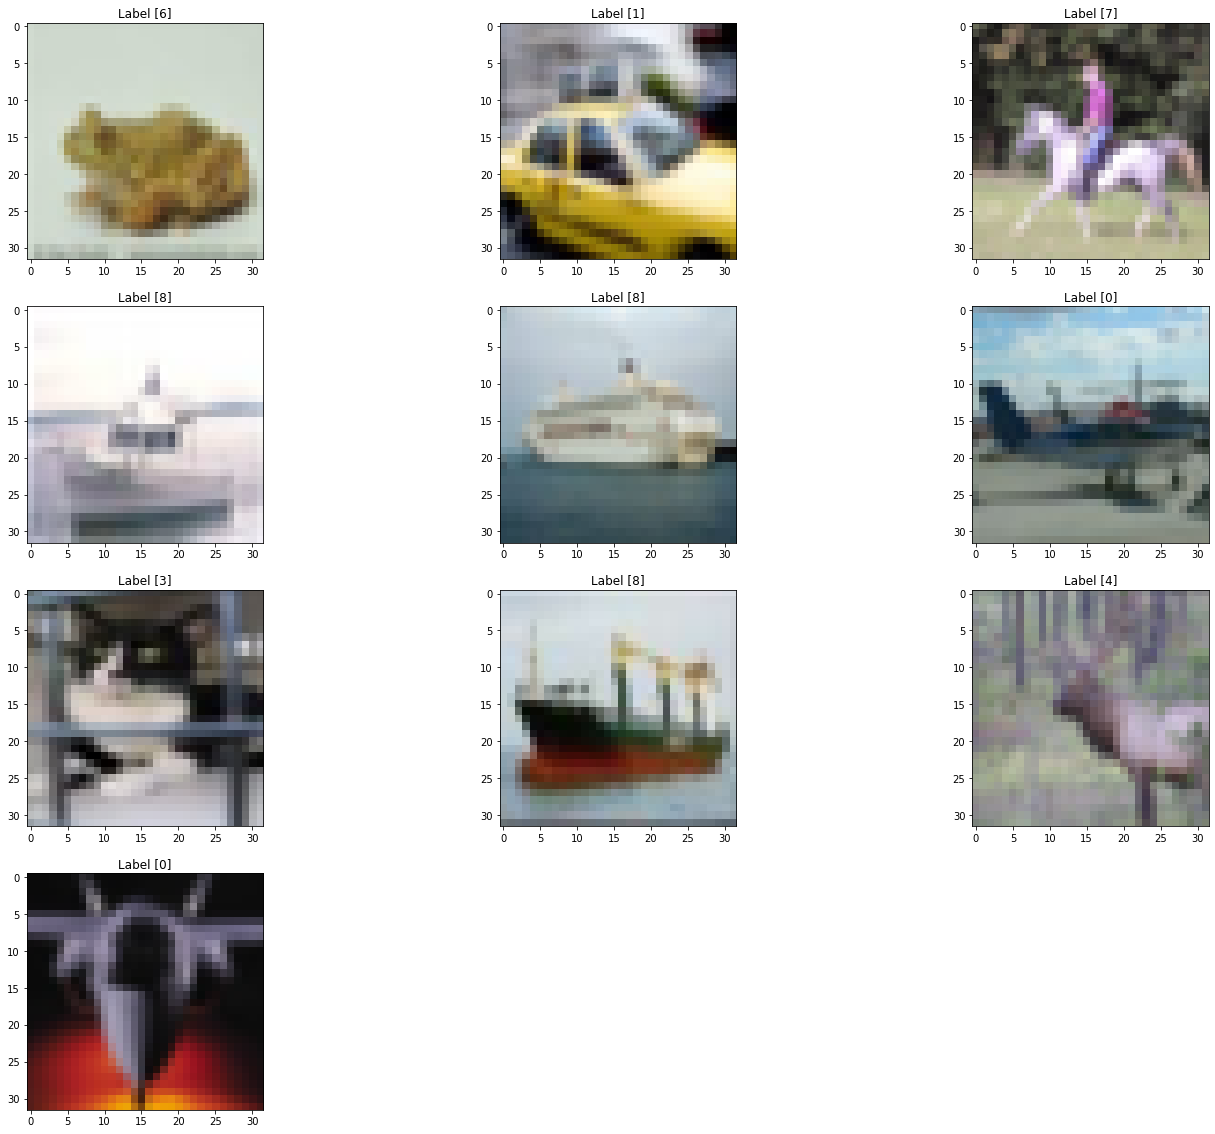

In [4]:
# Show thử vài bức ảnh
print(" Show thử vài bức ảnh")
ShowImage(X_train[:10],y_train[:10].tolist())

# 1. Hãy dùng thư viện keras.layers để cài đặt VGG19 huấn luyện trên bộ dữ liệu cifar-10

In [5]:
def Model_VGG19(regularizer,lrn_rate):
  #Khởi tạo mô hình
  model=keras.Sequential()

  #phải reshape lại input theo đúng (?,A,B,C)
  model.add(keras.layers.Reshape((32,32,3),input_shape=(32,32,3)))

  #block1
  #Gồm 2 lớp Convolution và 1 lớp maxpooling pool_size là 2x2
  #filter 64, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
  model.add(keras.layers.Convolution2D(filters=64,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=64,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding='same',
                                      activation=keras.activations.relu))
  model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                                  strides=[2,2]))

  #block2
  #Gồm 2 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
  #filter 128, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
  model.add(keras.layers.Convolution2D(filters=128,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=128,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                      strides=[2,2]))

  #block3
  #Gồm 4 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
  #filter 256, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
  model.add(keras.layers.Convolution2D(filters=256,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=256,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=256,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=256,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                            strides=[2,2]))
  #block4
  #Gồm 4 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
  #filter 512, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                                  strides=[2,2]))
  #block5
  #Gồm 4 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
  #filter 512, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                                  strides=[2,2]))

  #block 6
  #Gồm lớp Flatten để duỗi ra
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(units=4096,
                              activation=keras.activations.relu,
                              kernel_regularizer=keras.regularizers.l2(regularizer)))
  model.add(keras.layers.Dropout(rate=0.5))

  model.add(keras.layers.Dense(units=4096,
                              activation=keras.activations.relu,
                              kernel_regularizer=keras.regularizers.l2(regularizer)))
  model.add(keras.layers.Dropout(rate=0.5))

  model.add(keras.layers.Dense(units=10,
                              activation=keras.activations.softmax))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=lrn_rate),    ##tự khai báo Optimizer với learning rate 10^-4
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])
  return model

In [18]:
regularizer=0.0005
lrn_rate=10**(-4)
model = Model_VGG19(regularizer,lrn_rate)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                        

In [7]:
### Tạo một callback ModelCheckpoint: callback này sẽ lưu model mỗi khi tìm được một model tốt hơn
#### filepath: đường dẫn file muốn lưu
#### monitor: đại lượng quyết định xem model có "tốt hơn" hay không
#### mode='auto'/'max'/'min': đại lượng monitor lớn hay nhỏ là tốt hơn
#### verbose: có thông báo mỗi lần lưu ko
#### save_best_only: chỉ lưu model tốt nhất
def train_evalue_VGG19(model, ep,b_size):
  mc = keras.callbacks.ModelCheckpoint(filepath="vgg16_mnist.h5", 
                                      monitor='val_loss',
                                      mode='min', 
                                      verbose=0, 
                                      save_best_only=True)

  ## Train  ## Khuyến cáo chạy COLAB (hoặc tương tự)
  history = model.fit(X_train, y_train,
                      batch_size=b_size,
                      epochs=ep,
                      validation_data=(X_valid, y_valid),
                      callbacks=[mc])                     ##sử dụng callback ModelCheckpoint trong quá trình train
  
  print("Đánh giá model trên tập test")
  ## Đánh giá model trên tập test
  valid_loss, valid_acc = model.evaluate(X_valid, y_valid)
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print("Valid: loss {} acc {} -- Test: loss {} valid {}".format(valid_loss, valid_acc, test_loss, test_acc))

  ## Load lại model tốt nhất đã lưu
  print("best model: ")
  model.load_weights("vgg16_mnist.h5")
  valid_loss, valid_acc = model.evaluate(X_valid, y_valid)
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print("Valid: loss {} acc {} -- Test: loss {} acc {}".format(valid_loss, valid_acc, test_loss, test_acc))

  return

In [19]:
ep = 10
b_size = 124
train_evalue_VGG19(model, ep,b_size)

Epoch 1/10
363/363 [==============================] - 31s 83ms/step - loss: 2.8183 - accuracy: 0.1672 - val_loss: 2.0661 - val_accuracy: 0.2166
Epoch 2/10
363/363 [==============================] - 30s 84ms/step - loss: 1.9507 - accuracy: 0.2571 - val_loss: 1.7440 - val_accuracy: 0.3426
Epoch 3/10
363/363 [==============================] - 30s 82ms/step - loss: 1.6518 - accuracy: 0.3806 - val_loss: 1.5217 - val_accuracy: 0.4332
Epoch 4/10
363/363 [==============================] - 30s 82ms/step - loss: 1.4574 - accuracy: 0.4619 - val_loss: 1.3833 - val_accuracy: 0.5034
Epoch 5/10
363/363 [==============================] - 30s 83ms/step - loss: 1.3103 - accuracy: 0.5320 - val_loss: 1.2782 - val_accuracy: 0.5484
Epoch 6/10
363/363 [==============================] - 30s 82ms/step - loss: 1.1459 - accuracy: 0.5980 - val_loss: 1.1026 - val_accuracy: 0.6160
Epoch 7/10
363/363 [==============================] - 30s 83ms/step - loss: 1.0177 - accuracy: 0.6474 - val_loss: 1.0586 - val_accuracy:

# 2. Chỉnh các tham số (lrn_rate, l2 weight decay, epochs, batch_size) và nhận xét performance sẽ thay đổi như thế nào

## Thay đổi lrn_rate


### Tăng learning rate

In [22]:
regularizer=0.0005
lrn_rate=10**(-3)
ep = 10
b_size = 124
model2 = Model_VGG19(regularizer,lrn_rate)
train_evalue_VGG19(model2, ep,b_size)

Epoch 1/10
363/363 [==============================] - 31s 82ms/step - loss: 2.3681 - accuracy: 0.0989 - val_loss: 2.3031 - val_accuracy: 0.0980
Epoch 2/10
363/363 [==============================] - 30s 82ms/step - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.0970
Epoch 3/10
363/363 [==============================] - 30s 81ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0970
Epoch 4/10
363/363 [==============================] - 29s 81ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.0992
Epoch 5/10
363/363 [==============================] - 28s 76ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 6/10
363/363 [==============================] - 28s 77ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.0986
Epoch 7/10
363/363 [==============================] - 28s 76ms/step - loss: 2.3028 - accuracy: 0.0941 - val_loss: 2.3028 - val_accuracy:

*Nhận xét*:  Khi tăng learning rate model không hội tụ về tốt, bước nhảy lớn làm model ra khó tiến về điểm tối ưu

### Giảm learning rate

In [10]:
regularizer=0.0005
lrn_rate=10**(-5)
ep = 10
b_size = 124
model3 = Model_VGG19(regularizer,lrn_rate)
train_evalue_VGG19(model3, ep,b_size)

Epoch 1/10
363/363 [==============================] - 32s 83ms/step - loss: 4.3127 - accuracy: 0.1426 - val_loss: 3.8891 - val_accuracy: 0.1932
Epoch 2/10
363/363 [==============================] - 30s 83ms/step - loss: 3.7095 - accuracy: 0.2029 - val_loss: 3.5150 - val_accuracy: 0.2348
Epoch 3/10
363/363 [==============================] - 30s 82ms/step - loss: 3.4278 - accuracy: 0.2246 - val_loss: 3.2771 - val_accuracy: 0.2516
Epoch 4/10
363/363 [==============================] - 30s 83ms/step - loss: 3.2323 - accuracy: 0.2441 - val_loss: 3.1318 - val_accuracy: 0.2754
Epoch 5/10
363/363 [==============================] - 30s 83ms/step - loss: 3.0576 - accuracy: 0.2669 - val_loss: 2.9737 - val_accuracy: 0.2830
Epoch 6/10
363/363 [==============================] - 30s 83ms/step - loss: 2.9056 - accuracy: 0.2919 - val_loss: 2.8070 - val_accuracy: 0.3156
Epoch 7/10
363/363 [==============================] - 30s 83ms/step - loss: 2.7731 - accuracy: 0.3187 - val_loss: 2.6663 - val_accuracy:

*Nhận xét:* Khi giảm learning rate, model hội tụ chậm dẫn đến quá trình train lâu và có thể bị plateus

## Thay đổi epochs

### Tăng epochs

In [11]:
regularizer=0.0005
lrn_rate=10**(-4)
ep = 15
b_size = 124
model4 = Model_VGG19(regularizer,lrn_rate)
train_evalue_VGG19(model4, ep,b_size)

Epoch 1/15
363/363 [==============================] - 32s 84ms/step - loss: 2.8577 - accuracy: 0.1748 - val_loss: 2.1580 - val_accuracy: 0.2034
Epoch 2/15
363/363 [==============================] - 30s 82ms/step - loss: 1.9736 - accuracy: 0.2635 - val_loss: 1.7762 - val_accuracy: 0.3568
Epoch 3/15
363/363 [==============================] - 30s 82ms/step - loss: 1.6685 - accuracy: 0.3805 - val_loss: 1.5860 - val_accuracy: 0.4040
Epoch 4/15
363/363 [==============================] - 30s 82ms/step - loss: 1.4813 - accuracy: 0.4477 - val_loss: 1.3749 - val_accuracy: 0.5004
Epoch 5/15
363/363 [==============================] - 30s 82ms/step - loss: 1.2935 - accuracy: 0.5384 - val_loss: 1.2127 - val_accuracy: 0.5854
Epoch 6/15
363/363 [==============================] - 30s 83ms/step - loss: 1.1227 - accuracy: 0.6128 - val_loss: 1.0610 - val_accuracy: 0.6366
Epoch 7/15
363/363 [==============================] - 30s 82ms/step - loss: 0.9962 - accuracy: 0.6628 - val_loss: 0.9833 - val_accuracy:

*Nhận xét:* Khi tăng epochs cho kết quả tốt hơn do thơi gian train model được tăng, model được train kỹ hơn

## Thay đổi batch_size

### Tăng batch_size

In [12]:
regularizer=0.0005
lrn_rate=10**(-4)
ep = 15
b_size = 256
model5 = Model_VGG19(regularizer,lrn_rate)
train_evalue_VGG19(model5, ep,b_size)

Epoch 1/15
176/176 [==============================] - 32s 158ms/step - loss: 3.4050 - accuracy: 0.1499 - val_loss: 2.5293 - val_accuracy: 0.1860
Epoch 2/15
176/176 [==============================] - 24s 138ms/step - loss: 2.2656 - accuracy: 0.2019 - val_loss: 2.0600 - val_accuracy: 0.2200
Epoch 3/15
176/176 [==============================] - 24s 139ms/step - loss: 1.9700 - accuracy: 0.2747 - val_loss: 1.7822 - val_accuracy: 0.3600
Epoch 4/15
176/176 [==============================] - 24s 138ms/step - loss: 1.6814 - accuracy: 0.3862 - val_loss: 1.5930 - val_accuracy: 0.4222
Epoch 5/15
176/176 [==============================] - 24s 137ms/step - loss: 1.4741 - accuracy: 0.4673 - val_loss: 1.3969 - val_accuracy: 0.5118
Epoch 6/15
176/176 [==============================] - 24s 138ms/step - loss: 1.3060 - accuracy: 0.5390 - val_loss: 1.2682 - val_accuracy: 0.5660
Epoch 7/15
176/176 [==============================] - 24s 136ms/step - loss: 1.1574 - accuracy: 0.6004 - val_loss: 1.1251 - val_ac

*Nhận xét*: Việc tăng giảm batch_size không ảnh hưởng nhiều đến kết quả của model. 

## Thay đổi l2 weight decay

### Tăng l2 weight decay

In [20]:
regularizer=0.005
lrn_rate=10**(-4)
ep = 10
b_size = 124
model5 = Model_VGG19(regularizer,lrn_rate)
train_evalue_VGG19(model5, ep,b_size)

Epoch 1/10
363/363 [==============================] - 31s 83ms/step - loss: 8.1728 - accuracy: 0.1617 - val_loss: 2.3333 - val_accuracy: 0.1934
Epoch 2/10
363/363 [==============================] - 30s 82ms/step - loss: 2.0033 - accuracy: 0.2013 - val_loss: 1.8491 - val_accuracy: 0.2206
Epoch 3/10
363/363 [==============================] - 30s 82ms/step - loss: 1.8363 - accuracy: 0.2399 - val_loss: 1.7554 - val_accuracy: 0.2884
Epoch 4/10
363/363 [==============================] - 30s 82ms/step - loss: 1.6924 - accuracy: 0.3404 - val_loss: 1.6020 - val_accuracy: 0.3950
Epoch 5/10
363/363 [==============================] - 30s 82ms/step - loss: 1.4765 - accuracy: 0.4308 - val_loss: 1.3616 - val_accuracy: 0.4644
Epoch 6/10
363/363 [==============================] - 30s 82ms/step - loss: 1.3145 - accuracy: 0.5050 - val_loss: 1.2685 - val_accuracy: 0.5202
Epoch 7/10
363/363 [==============================] - 30s 82ms/step - loss: 1.1754 - accuracy: 0.5872 - val_loss: 1.1292 - val_accuracy:

*Nhận xét:* Model train cho kết quả tương đối, có thấp so với khi tăng. Tuy nhiên để ý epoch 1 thì ta thấy loss khá cao khi khởi tạo.